In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00


In [6]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_excel("/content/drive/MyDrive/infosys dataset/obesity_data_with_status_50000.xlsx")

In [8]:
df.head(5)

,Age,Gender,Height_cm,Weight_kg,BMI,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,172.005936,68.686179,23.215738,4,1,2,0,1,Hypertension Stage 2,2,1,3,2,Normal weight
1,69,1,161.678497,79.937723,30.580688,2,0,0,0,0,Elevated,1,2,1,3,Obese
2,46,1,172.078597,99.707918,33.672545,4,1,1,1,0,Normal,3,2,3,2,Obese
3,32,1,176.845709,76.314302,24.401520,1,2,0,1,0,Normal,3,1,2,1,Normal weight
4,60,1,170.875161,84.397860,28.905039,2,1,0,2,1,Elevated,2,3,3,2,Overweight


In [9]:
df.shape

(50000, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  int64  
 2   Height_cm                50000 non-null  float64
 3   Weight_kg                50000 non-null  float64
 4   BMI                      50000 non-null  float64
 5   Physical_Activity_Level  50000 non-null  int64  
 6   Diet_Type                50000 non-null  int64  
 7   Smoking_Habits           50000 non-null  int64  
 8   Alcohol_Consumption      50000 non-null  int64  
 9   Family_History_Obesity   50000 non-null  int64  
 10  Blood_Pressure           50000 non-null  object 
 11  Cholesterol_Levels       50000 non-null  int64  
 12  Education_Level          50000 non-null  int64  
 13  Income_Level             50000 non-null  int64  
 14  Geographical_Region   

In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Physical_Activity_Level,0
Diet_Type,0
Smoking_Habits,0
Alcohol_Consumption,0
Family_History_Obesity,0


In [12]:
df = df.drop(columns=['BMI'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  int64  
 2   Height_cm                50000 non-null  float64
 3   Weight_kg                50000 non-null  float64
 4   Physical_Activity_Level  50000 non-null  int64  
 5   Diet_Type                50000 non-null  int64  
 6   Smoking_Habits           50000 non-null  int64  
 7   Alcohol_Consumption      50000 non-null  int64  
 8   Family_History_Obesity   50000 non-null  int64  
 9   Blood_Pressure           50000 non-null  object 
 10  Cholesterol_Levels       50000 non-null  int64  
 11  Education_Level          50000 non-null  int64  
 12  Income_Level             50000 non-null  int64  
 13  Geographical_Region      50000 non-null  int64  
 14  Obesity_Status        

In [14]:
label_encoder = LabelEncoder()
df['Obesity_Status'] = label_encoder.fit_transform(df['Obesity_Status'])
df['Blood_Pressure'] = label_encoder.fit_transform(df['Blood_Pressure'])

scaler = StandardScaler()
df[['Height_cm', 'Weight_kg']] = scaler.fit_transform(df[['Height_cm', 'Weight_kg']])

In [15]:
df.describe()

,Age,Gender,Height_cm,Weight_kg,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,49.027820,0.502680,1.149267e-15,-8.945733e-17,2.503460,0.999740,0.999600,0.999420,0.500340,1.500040,1.997060,3.013540,2.005140,2.000720,1.140020
std,18.170405,0.499998,1.000010e+00,1.000010e+00,1.120309,0.817235,0.817076,0.818311,0.500005,1.116058,0.816569,1.414255,0.816803,0.816072,1.002973
min,18.000000,0.000000,-4.461400e+00,-4.000789e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,0.000000,-6.712440e-01,-6.722715e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,49.000000,1.000000,2.489439e-03,-9.984719e-04,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000
75%,65.000000,1.000000,6.736295e-01,6.727743e-01,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000,3.000000,2.000000
max,80.000000,1.000000,3.817744e+00,4.198916e+00,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000


In [16]:
df[['Height_cm', 'Weight_kg']].mean()


,0
Height_cm,1.149267e-15
Weight_kg,-8.945733e-17


In [17]:
df[['Height_cm', 'Weight_kg']].mean().round(6)

,0
Height_cm,0.0
Weight_kg,-0.0


In [18]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(df[['Height_cm', 'Weight_kg']])
df_clean = df[outliers != -1]
df_clean.head()

,Age,Gender,Height_cm,Weight_kg,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,0.194510,-0.423099,4,1,2,0,1,2,2,1,3,2,0
1,69,1,-0.836539,0.326852,2,0,0,0,0,0,1,2,1,3,1
2,46,1,0.201764,1.644600,4,1,1,1,0,3,3,2,3,2,1
3,32,1,0.677693,0.085340,1,2,0,1,0,3,3,1,2,1,0
4,60,1,0.081618,0.624135,2,1,0,2,1,0,2,3,3,2,2


In [19]:
df_clean.shape

(49500, 15)

In [20]:
from sklearn.model_selection import train_test_split


X_train_val, X_test, y_train_val, y_test = train_test_split(
    df_clean.drop(columns='Obesity_Status'),
    df_clean['Obesity_Status'],
    test_size=0.2,  # Reserve 20% for testing
    random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.3,
    random_state=42
)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (27720, 14)
Validation set size: (11880, 14)
Test set size: (9900, 14)


In [21]:
df_clean.head(10)

,Age,Gender,Height_cm,Weight_kg,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region,Obesity_Status
0,56,0,0.194510,-0.423099,4,1,2,0,1,2,2,1,3,2,0
1,69,1,-0.836539,0.326852,2,0,0,0,0,0,1,2,1,3,1
2,46,1,0.201764,1.644600,4,1,1,1,0,3,3,2,3,2,1
3,32,1,0.677693,0.085340,1,2,0,1,0,3,3,1,2,1,0
4,60,1,0.081618,0.624135,2,1,0,2,1,0,2,3,3,2,2
5,25,0,-0.429191,-0.688294,2,1,1,2,1,2,1,1,2,3,0
6,78,1,-0.292387,-0.660303,3,0,1,2,1,0,2,3,3,3,0
7,38,1,0.645344,0.344262,3,2,0,2,0,1,3,5,1,3,2
8,56,1,-1.104125,1.585291,4,2,0,2,0,3,3,5,3,1,1
9,75,1,-0.820872,0.021831,1,1,1,0,1,2,2,2,3,3,2


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
tabnet_model = TabNetClassifier()

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tabnet_model = TabNetClassifier()


tabnet_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=50,
    batch_size=1024,
)

# Make predictions
y_pred = tabnet_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


C:\Users\91637\anaconda3\envs\yolo\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.09758 | val_0_accuracy: 0.72899 |  0:00:01s
epoch 1  | loss: 0.4085  | val_0_accuracy: 0.92828 |  0:00:03s
epoch 2  | loss: 0.22305 | val_0_accuracy: 0.95828 |  0:00:05s
epoch 3  | loss: 0.17795 | val_0_accuracy: 0.94263 |  0:00:06s
epoch 4  | loss: 0.17958 | val_0_accuracy: 0.97414 |  0:00:08s
epoch 5  | loss: 0.16473 | val_0_accuracy: 0.95212 |  0:00:09s
epoch 6  | loss: 0.15289 | val_0_accuracy: 0.9797  |  0:00:11s
epoch 7  | loss: 0.14184 | val_0_accuracy: 0.96535 |  0:00:13s
epoch 8  | loss: 0.14428 | val_0_accuracy: 0.94293 |  0:00:14s
epoch 9  | loss: 0.15052 | val_0_accuracy: 0.9299  |  0:00:16s
epoch 10 | loss: 0.14132 | val_0_accuracy: 0.97909 |  0:00:18s
epoch 11 | loss: 0.12862 | val_0_accuracy: 0.97838 |  0:00:19s
epoch 12 | loss: 0.11818 | val_0_accuracy: 0.97535 |  0:00:21s
epoch 13 | loss: 0.1152  | val_0_accuracy: 0.96929 |  0:00:23s
epoch 14 | loss: 0.13143 | val_0_accuracy: 0.96222 |  0:00:24s
epoch 15 | loss: 0.14391 | val_0_accuracy: 0.9796  |  0

C:\Users\91637\anaconda3\envs\yolo\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9796969696969697


In [25]:
tabnet_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val), (X_test_scaled, y_test)],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=50,
    batch_size=512,

)

epoch 0  | loss: 0.85804 | val_0_accuracy: 0.79108 | val_1_accuracy: 0.78838 |  0:00:04s
epoch 1  | loss: 0.27759 | val_0_accuracy: 0.90051 | val_1_accuracy: 0.89949 |  0:00:07s
epoch 2  | loss: 0.23357 | val_0_accuracy: 0.94958 | val_1_accuracy: 0.9499  |  0:00:11s
epoch 3  | loss: 0.20557 | val_0_accuracy: 0.95101 | val_1_accuracy: 0.94899 |  0:00:14s
epoch 4  | loss: 0.2048  | val_0_accuracy: 0.97029 | val_1_accuracy: 0.96899 |  0:00:17s
epoch 5  | loss: 0.18731 | val_0_accuracy: 0.9681  | val_1_accuracy: 0.96545 |  0:00:19s
epoch 6  | loss: 0.18058 | val_0_accuracy: 0.97071 | val_1_accuracy: 0.96909 |  0:00:23s
epoch 7  | loss: 0.16617 | val_0_accuracy: 0.9681  | val_1_accuracy: 0.96848 |  0:00:27s
epoch 8  | loss: 0.17526 | val_0_accuracy: 0.97088 | val_1_accuracy: 0.96899 |  0:00:30s
epoch 9  | loss: 0.17403 | val_0_accuracy: 0.95859 | val_1_accuracy: 0.95677 |  0:00:32s
epoch 10 | loss: 0.18606 | val_0_accuracy: 0.9415  | val_1_accuracy: 0.94081 |  0:00:35s
epoch 11 | loss: 0.16

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [26]:
# Make predictions on the test set
y_pred = tabnet_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9872727272727273


In [27]:
history = tabnet_model.history

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3504
           1       0.99      0.99      0.99      2495
           2       0.99      0.99      0.99      2991
           3       0.96      0.98      0.97       910

    accuracy                           0.99      9900
   macro avg       0.98      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



In [30]:
cm = confusion_matrix(y_test, y_pred)

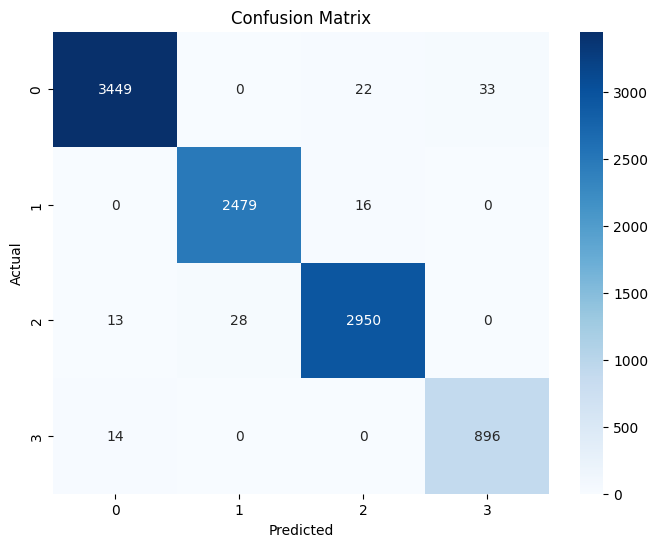

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
